# Pandas (phần 3)

Cập nhật lần cuối: 24/12/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## Đọc dữ liệu từ file vào dataframe

pd.read_csv

Dữ liệu: [MovieLens 100K Dataset](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip). Có tất cả 4 file csv, trong phần demo bên dưới chỉ dùng 2 file.

Theo [file mô tả dữ liệu](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html):
>This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
>
>Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

In [3]:
# Đọc dữ liệu từ file movies.csv vào dataframe movies_df
# Đọc dữ liệu từ file ratings.csv vào dataframe ratings_df
# Mình đặt các file csv trong thư mục Data/ml-latest-small
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('Data/ml-latest-small/ratings.csv')

## Xem nhanh một vài dòng của dataframe

- df.head
- df.tail
- df.sample

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Xem các thông tin của dataframe

- len(df)
- df.shape
- df.index
- df.columns
- df.dtypes
- df.values (vì tương lai, nên thay bằng df.to_numpy)
- df.info

## Truy xuất dữ liệu ở dataframe

- df.iloc[r, c]
- df.loc[r, c]
- df[...]

## Thay đổi dữ liệu ở dataframe

- df.iloc[...] = ...
- df.loc[...] = ...
- df[...] = ...

## Thay đổi tên dòng/cột ở dataframe

- df.rename
- df.columns = ...
- df.index = ...
- df.set_index, df.reset_index

## Thay đổi kiểu dữ liệu của cột ở dataframe

- s.astype
- pd.to_datetime

## Thực hiện thao tác với cột có kiểu dữ liệu dạng thời gian ở dataframe
s.dt.

## Thực hiện thao tác với cột có kiểu dữ liệu dạng chuỗi ở dataframe

s.str.

## Thêm/xóa dòng/cột ở dataframe

- pd.concat, df[tên cột] = ...
- df.drop

## Xem phân bố các giá trị của mỗi cột ở dataframe

- df.agg([col_function1, col_function2...])
- s.plot.hist
- s.value_counts().plot.barh

## Sắp xếp dữ liệu ở dataframe

- df.sort_values
- df.sort_index

## Xử lý giá trị thiếu ở dataframe

- df.fillna
- df.dropna

## Thực hiện thao tác trên dataframe mà không được định nghĩa sẵn

In [6]:
df = movies_df[['title', 'genres']]

Tính chiều dài của mỗi chuỗi trong dataframe df.

In [7]:
# Cách 1: áp dụng một hàm nào đó lên từng cột của dataframe
df.apply(lambda s: s.str.len(), axis=0)

,title,genres
0,16,43
1,14,26
2,23,14
3,24,20
4,34,6
...,...,...
9737,41,31
9738,28,24
9739,12,5
9740,35,16


In [8]:
# Cách 2: áp dụng một hàm nào đó lên từng phần tử của dataframe
df.applymap(len)

,title,genres
0,16,43
1,14,26
2,23,14
3,24,20
4,34,6
...,...,...
9737,41,31
9738,28,24
9739,12,5
9740,35,16


Để ý sự khác biệt khi gọi phương thức apply từ dataframe và khi gọi từ series.

In [9]:
df.apply(len)

title     9742
genres    9742
dtype: int64

In [10]:
df['title'].apply(len)

0       16
1       14
2       23
3       24
4       34
        ..
9737    41
9738    28
9739    12
9740    35
9741    35
Name: title, Length: 9742, dtype: int64

## Kết hợp dữ liệu từ nhiều dataframe

In [11]:
df1 = pd.DataFrame({'c1': [1, 1, 1], 'c2': [2, 22, 222]})
df1

,c1,c2
0,1,2
1,1,22
2,1,222


In [12]:
df2 = pd.DataFrame({'c3': [3, 3, 3, 3], 'c2': [22, 222, 2222, 22222]})
df2

,c3,c2
0,3,22
1,3,222
2,3,2222
3,3,22222


Merge df1và df2 lại dựa vào cột c2

In [13]:
df1.merge(df2, how='inner', indicator=True)

,c1,c2,c3,_merge
0,1,22,3,both
1,1,222,3,both


In [14]:
df1.merge(df2, how='outer', indicator=True)

,c1,c2,c3,_merge
0,1.0,2,NaN,left_only
1,1.0,22,3.0,both
2,1.0,222,3.0,both
3,NaN,2222,3.0,right_only
4,NaN,22222,3.0,right_only


In [15]:
df1.merge(df2, how='left', indicator=True)

,c1,c2,c3,_merge
0,1,2,NaN,left_only
1,1,22,3.0,both
2,1,222,3.0,both


In [16]:
df1.merge(df2, how='right', indicator=True)

,c1,c2,c3,_merge
0,1.0,22,3,both
1,1.0,222,3,both
2,NaN,2222,3,right_only
3,NaN,22222,3,right_only


## Gom nhóm và tính toán trong mỗi nhóm

Cho biết mỗi movie (dùng title để biểu diễn movie) có bao nhiêu người đánh giá và điểm TB là bao nhiêu?

Các bước:
1. Từ ratings_df, merge với movies_df để có thông tin về title của movie
2. Từ kết quả ở trên, tiến hành gom nhóm các dòng theo title; với mỗi nhóm, tính số người đánh giá (số dòng) và điểm TB

Vấn đề: có thể có các movie bị trùng title!

Điều chỉnh lại các bước như sau:
1. Từ ratings_df, tiến hành gom nhóm các dòng theo movieId; với mỗi nhóm, tính số người đánh giá (số dòng) và điểm TB
2. Từ kết quả ở trên, merge với movies_df để có thông tin về title của movie

In [17]:
# Bước 1
df = ratings_df
# df = df[['movieId', 'rating']].groupby('movieId').agg(['mean', 'size'])
df = df.groupby('movieId')['rating'].agg(['mean', 'size'])
# df = df.groupby('movieId').agg(['mean', 'size'])['rating']

# Bước 2
df2 = movies_df[['movieId', 'title']]
df = df.merge(df2, on='movieId')
df = df.sort_values('size', ascending=False)
df.head(10)

,movieId,mean,size,title
314,356,4.164134,329,Forrest Gump (1994)
277,318,4.429022,317,"Shawshank Redemption, The (1994)"
257,296,4.197068,307,Pulp Fiction (1994)
510,593,4.161290,279,"Silence of the Lambs, The (1991)"
1938,2571,4.192446,278,"Matrix, The (1999)"
224,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977)
418,480,3.750000,238,Jurassic Park (1993)
97,110,4.031646,237,Braveheart (1995)
507,589,3.970982,224,Terminator 2: Judgment Day (1991)
461,527,4.225000,220,Schindler's List (1993)


Với các movie được sản xuất vào năm 1999, cho biết mỗi movie (dùng title để biểu diễn movie) có bao nhiêu người đánh giá và điểm TB là bao nhiêu?

In [18]:
df = movies_df['title'].str.extract(r'\((\d{4})\)')
df.columns = ['year']
movies_with_year_df = pd.concat([movies_df, df], axis=1)
movies_with_year_df.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [19]:
df = ratings_df
df = df.merge(movies_with_year_df[['movieId', 'year']])
df = df[df['year'] == '1999']

df = df.groupby('movieId')['rating'].agg(['mean', 'size'])

df = df.merge(movies_df[['movieId', 'title']], on='movieId')
df = df.sort_values('size', ascending=False)
df.head(10)

,movieId,mean,size,title
32,2571,4.192446,278,"Matrix, The (1999)"
123,2959,4.272936,218,Fight Club (1999)
103,2858,4.056373,204,American Beauty (1999)
82,2762,3.893855,179,"Sixth Sense, The (1999)"
51,2628,3.107143,140,Star Wars: Episode I - The Phantom Menace (1999)
59,2683,3.198347,121,Austin Powers: The Spy Who Shagged Me (1999)
162,3147,4.148649,111,"Green Mile, The (1999)"
67,2706,3.378641,103,American Pie (1999)
136,2997,3.954545,99,Being John Malkovich (1999)
154,3114,3.860825,97,Toy Story 2 (1999)


## Thay đổi shape của dataframe

Với mỗi năm sản xuất, movie nào là movie của năm (được nhiều người đánh giá nhất)?

In [20]:
df = ratings_df
df = df.merge(movies_with_year_df[['movieId', 'year']])
s = df.groupby(['year', 'movieId']).size()
s

year  movieId
1902  32898      5
1903  49389      2
1908  140541     1
1915  7065       1
1916  7243       1
                ..
2018  189333     2
      189381     1
      189713     1
      190183     1
      193587     1
Length: 9711, dtype: int64

In [21]:
# Chuyển các giá trị của cột index chỉ số 1 (movieId) 
# lên thành các cột!
# Sau khi chuyển: thông tin về số lượng người đánh giá của các movie
# thuộc cùng một năm sản xuất đã nằm trên một dòng! --> sẵn sàng để 
# tìm ra movie được nhiều người đánh giá nhất của mỗi năm
# (Hình dung: series cao và gầy --> dataframe lùn và mập)
s.unstack(1)  

movieId,32898,49389,140541,7065,7243,62383,72921,102747,8511,3132,...,188751,188797,188833,189043,189111,189333,189381,189713,190183,193587
year,,,,,,,,,,,,,,,,,,,,,
1902,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = s.unstack(1)  
df = df.idxmax(axis=1).to_frame() # Mặc định thì Pandas sẽ bỏ qua nan
df.columns = ['movieId']
df = df.reset_index()
df = df.merge(movies_df[['movieId', 'title']])
df.tail(10)

,year,movieId,title
96,2009,68954,Up (2009)
97,2010,79132,Inception (2010)
98,2011,88125,Harry Potter and the Deathly Hallows: Part 2 (...
99,2012,91529,"Dark Knight Rises, The (2012)"
100,2013,106782,"Wolf of Wall Street, The (2013)"
101,2014,109487,Interstellar (2014)
102,2015,134130,The Martian (2015)
103,2016,122904,Deadpool (2016)
104,2017,122918,Guardians of the Galaxy 2 (2017)
105,2018,122912,Avengers: Infinity War - Part I (2018)


## Xem mối quan hệ giữa 2 cột numeric trong dataframe

([Nguồn tham khảo](https://inferentialthinking.com/chapters/15/1/Correlation.html))

### Line plot

Dùng để trực quan hóa mối quan hệ giữa 2 cột numeric, trong đó một cột thường là datetime

In [23]:
df = pd.DataFrame({'date': pd.date_range(start='1/1/2021', periods=8),
                   'temperature': np.random.randint(20, 35, size=8)})
df

,date,temperature
0,2021-01-01,28
1,2021-01-02,33
2,2021-01-03,29
3,2021-01-04,29
4,2021-01-05,21
5,2021-01-06,27
6,2021-01-07,27
7,2021-01-08,22


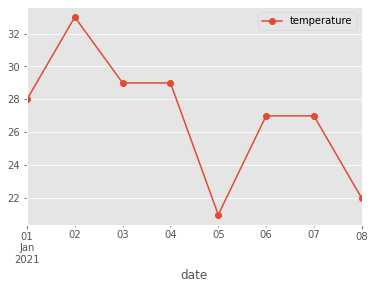

In [24]:
df.plot.line(x='date', y='temperature', marker='o');

### Scatter plot

Dùng để trực quan hóa mối quan hệ của 2 cột numeric nói chung; giống line plot nhưng không nối các điểm lại với nhau

In [25]:
cars_df = pd.read_csv('Data/Cars.csv')
cars_df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


Theo mô tả dữ liệu ở https://www.inferentialthinking.com/chapters/15/1/Correlation.html:

- "vehicle": model of the car
- "year": year of manufacture
- "msrp": manufacturer's suggested retail price in 2013 dollars
- "acceleration": acceleration rate in km per hour per second
- "mpg": fuel econonmy in miles per gallon
- "class": the model's class.

In [26]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle       153 non-null    object 
 1   year          153 non-null    int64  
 2   msrp          153 non-null    float64
 3   acceleration  153 non-null    float64
 4   mpg           153 non-null    float64
 5   class         153 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.3+ KB


In [27]:
# Đổi tên cột "msrp" thành "price" cho dễ nhớ
cars_df.rename(columns={'msrp': 'price'}, inplace=True)
cars_df.head()

,vehicle,year,price,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


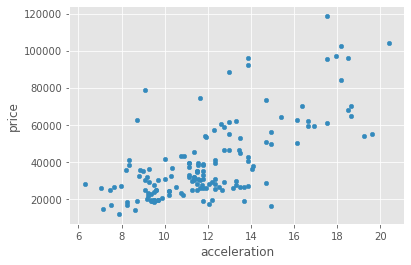

In [28]:
# "acceleration" & "price" có quan hệ gì với nhau?
cars_df.plot.scatter(x='acceleration', y='price');

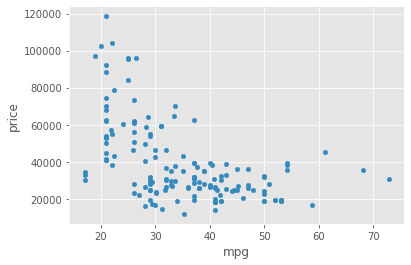

In [29]:
# "mpg" & "price" có quan hệ gì với nhau?
cars_df.plot.scatter(x='mpg', y='price');

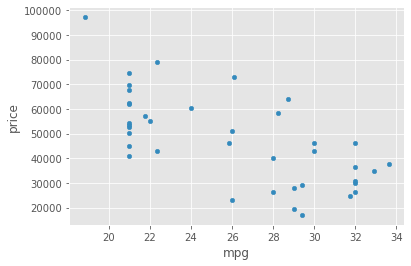

In [30]:
# "mpg" & "price" của class SUV có quan hệ gì với nhau?
df = cars_df
df = df[df['class'] == 'SUV']
df.plot.scatter('mpg', 'price');

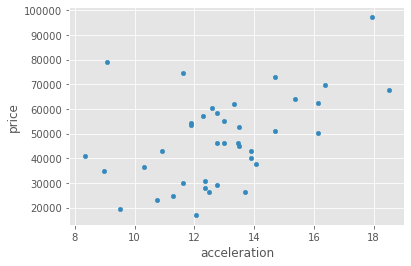

In [31]:
# "acceleration" & "price" của class SUV có quan hệ gì với nhau?
df = cars_df
df = df[df['class'] == 'SUV']
df.plot.scatter('acceleration', 'price');

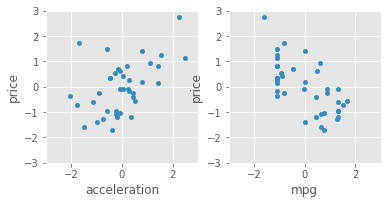

In [32]:
# Trong class SUV, so sánh 
# mức độ quan hệ tuyến tính giữa "acceleration" & "price"
# với mức độ quan hệ tuyến tính giữa "mpg" & "price"
# Để có thể so sánh bằng cách trực quan hóa thì ta cần
# chuẩn hóa các cột về đơn vị chuẩn bằng cách lấy mỗi
# cột trừ đi mean của cột rồi chia cho std của cột

df = cars_df
df = df[df['class'] == 'SUV']
df = df[['acceleration', 'mpg', 'price']]
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0) # Lưu ý ddof!

fig, axs = plt.subplots(1, 2)
axs[0].set(xlim=(-3, 3), ylim=(-3, 3), aspect=1)
axs[1].set(xlim=(-3, 3), ylim=(-3, 3), aspect=1)
df.plot.scatter('acceleration', 'price', ax=axs[0])
df.plot.scatter('mpg', 'price', ax=axs[1]);

### Correlation coefficient (r)

**Correlation coefficient (r):** giá trị cho biết mức độ quan hệ TUYẾN TÍNH giữa 2 biến.
- r thuộc [-1, 1].
- |r| càng lớn nghĩa là mức độ quan hệ tuyến tính càng cao.
- r > 0 nghĩa là đồng biến, r < 0 nghĩa là nghịch biến.

Cách tính: r = trung bình của tích các giá trị tương ứng của 2 biến trong đơn vị chuẩn.

1.0

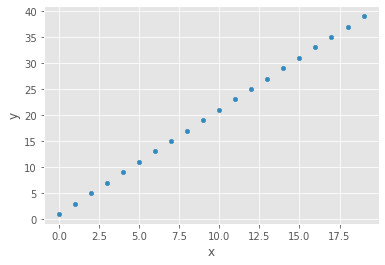

In [33]:
# r - ví dụ 1
x = np.arange(20)
y = 2 * x + 1
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

0.043105761655098974

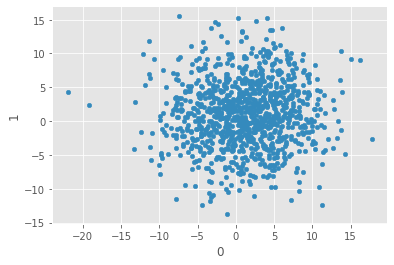

In [34]:
# r - ví dụ 2
xy = np.random.normal(loc=1, scale=5, size=(1000, 2))
df = pd.DataFrame(xy)
df.plot.scatter(0, 1)
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

In [35]:
# Trong class SUV, so sánh 
# mức độ quan hệ tuyến tính giữa "acceleration" & "price"
# với mức độ quan hệ tuyến tính giữa "mpg" & "price"

# Dùng r

df = cars_df
df = df[df['class'] == 'SUV']
df = df[['acceleration', 'mpg', 'price']]
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)

r_ap = (df['acceleration'] * df['price']).mean()
r_mp = (df['mpg'] * df['price']).mean()
r_ap, r_mp

(0.48699799279959155, -0.6667143635709919)

0.0

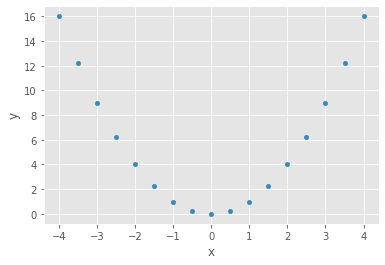

In [36]:
# Nếu r của 2 biến bằng 0
# thì có chắc là 2 biến không có quan hệ gì với nhau?
x = np.arange(-4, 4.1, 0.5)
df = pd.DataFrame({'x': x, 'y': x**2})
df.plot.scatter(x='x', y='y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

1.0

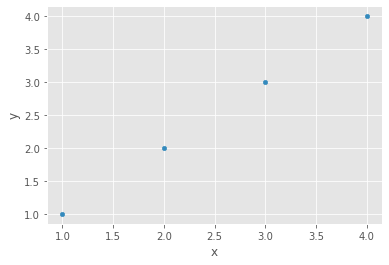

In [37]:
# r có bị ảnh hưởng bởi outlier?
x = np.array([1, 2, 3, 4])
y = x
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

0.0

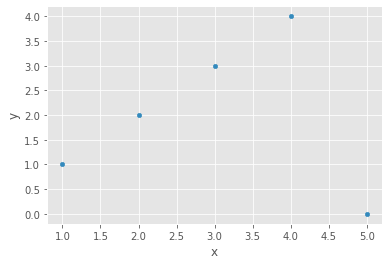

In [38]:
# r có bị ảnh hưởng bởi outlier?
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 0])
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

**Lưu ý**: 2 biến có quan hệ với nhau thì không chắc là quan hệ nhân-quả.

Ví dụ, người ta thấy khả năng đọc của các đứa trẻ có quan hệ đồng biến với kích thước giày của các đứa trẻ. Vậy cho trẻ mang giày có kích thước lớn có làm khả năng đọc của trẻ tăng lên?

Bạn có thể đọc [câu chuyện về John Snow trong những ngày bệnh dịch tả bùng phát](https://inferentialthinking.com/chapters/02/causality-and-experiments.html) để hiểu về cách để có thể kết luận một mối quan hệ là quan hệ nhân-quả.